In [120]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
trial_mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_drug_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_mouse_data = trial_mouse_data.merge(trial_drug_data, on='Mouse ID')

# Display the data table for preview
display(trial_mouse_data.head(5))


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [121]:
tumor_group = trial_mouse_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_mean = tumor_group.mean()

# Convert to DataFrame
tumor_mean = tumor_mean.to_frame()

# Preview DataFrame
tumor_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [122]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = tumor_group.sem()

# Convert to DataFrame
tumor_sem = tumor_sem.to_frame()

# Preview DataFrame
tumor_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [123]:
# Reformating data frame
tumor_mean = tumor_mean.unstack(level=0)
tumor_sem = tumor_sem.unstack(level=0)

# Displaying data frame
display(tumor_mean.head(5))

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

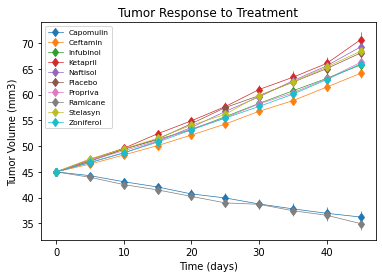

In [124]:
# Generate the Plot (with Error Bars)
for drug in tumor_mean.columns:
    plt.errorbar(tumor_mean.index, tumor_mean[drug], yerr=tumor_sem[drug], marker="d", linewidth=0.70)

# Labeling plot
plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (days)')
plt.legend([drug[1] for drug in tumor_mean.columns], loc='upper left', prop={'size': 7.5})

# Save the Figure
plt.savefig('TumorResponse.png')

In [125]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [126]:
# Store metastatic site data grouped by Drug and Timepoint
metastatic_group = trial_mouse_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites']

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = metastatic_group.mean()

# Convert to DataFrame
metastatic_mean = metastatic_mean.to_frame()

# Preview DataFrame
metastatic_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [127]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_error = metastatic_group.sem()

# Convert to DataFrame
metastatic_error = metastatic_error.to_frame()

# Preview DataFrame
metastatic_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [128]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean = metastatic_mean.unstack(level=0)
metastatic_error = metastatic_error.unstack(level=0)

# Preview that Reformatting worked
display(metastatic_mean.head(5))

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

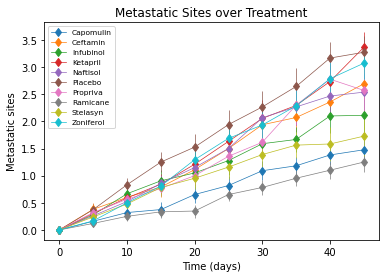

In [129]:
# Generate the Plot (with Error Bars)
for drug in metastatic_mean.columns:
    plt.errorbar(metastatic_mean.index, metastatic_mean[drug], yerr=metastatic_error[drug], marker="d", linewidth=0.70)

# Labeling plot
plt.title('Metastatic Sites over Treatment')
plt.ylabel('Metastatic sites')
plt.xlabel('Time (days)')
plt.legend([drug[1] for drug in metastatic_mean.columns], loc='upper left', prop={'size': 7.5})

# Save the Figure
plt.savefig('MetastaticResponse.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)